In [0]:
#Importing required modules
import math
import random
import matplotlib.pyplot as plt
from random import shuffle, uniform
from itertools import combinations

## Defino variables

In [0]:
x_pool = [-12.04861,-12.05956,-12.06524,-12.05998,-12.05541,-12.05417,-12.05349,-12.05268,-12.05278,-12.05301,-12.04937,-12.05465,-12.05486,-12.05059,-12.04253,-12.04817,-12.04668,-12.05606,-12.07258,-12.07414,-12.06771,-12.06921,-12.07396,-12.075,-12.09086,-12.09375,-12.09602,-12.02669,-12.0282,-12.03267,-12.03828,-12.03982,-12.04117,-12.0417,-12.04155,-12.03882,-12.03959,-12.03548,-12.03766,-12.03984,-12.04233,-12.04328,-12.04486,-12.04566,-12.03895,-12.12916,-12.13156,-12.13222,-12.1265,-12.1261,-12.12603,-12.12587,-12.12248,-12.12326,-12.12028,-12.1201,-12.12532,-12.12116,-12.12159,-12.11685]
y_pool = [-77.06496,-77.07583,-77.07334,-77.063,-77.07497,-77.07472,-77.07362,-77.07409,-77.07104,-77.07735,-77.07948,-77.06952,-77.07655,-77.07666,-77.09595,-77.05867,-77.0726,-77.06726,-77.06884,-77.0629,-77.06214,-77.0593,-77.051,-77.04631,-77.05947,-77.06947,-77.07398,-76.88958,-76.8912,-76.91418,-76.9157,-76.91897,-76.9186,-76.9221,-76.9213,-76.9238,-76.92422,-76.92502,-76.92863,-76.92827,-76.92739,-76.92851,-76.92715,-76.91841,-76.92025,-77.02984,-77.02371,-77.02358,-77.02697,-77.02889,-77.03129,-77.03583,-77.03332,-77.03639,-77.03866,-77.0343,-77.03135,-77.02889,-77.03092,-77.02991]
pob_pool = [16500,18000,17000,15000,17100,17350,17300,17400,17350,17400,16900,17200,17300,17500,18500,17100,16400,15950,16800,16950,14500,16400,17300,17000,14900,13900,11500,2900,2500,2000,3800,8500,7500,6000,6000,8600,8500,9200,9900,9900,9200,8700,7900,4000,8600,16000,15800,15600,18400,18800,18300,14500,17900,16950,17600,19000,18600,18000,18500,20000]
allele_pool = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]

num_individuals = 100
ind_size        = 10
pmut            = 0.7
pop_size = 100
max_gen = 100

## Creo funciones de optimización

In [0]:
def function1(chromosome):
    comb = combinations(chromosome, 2) 
    dist_x = 0
    dist_y = 0
    for com in comb:
      dist_x += abs(x_pool[com[0]] - x_pool[com[1]])
      dist_y += abs(y_pool[com[0]] - y_pool[com[1]])
    return dist_x + dist_y

def function2(chromosome):
    n = 0
    for c in chromosome:
      n +=  pob_pool[c]
    return n


## Defino resto de funciones para el cálculo

In [0]:
def index_of(a,list_t):
    for i in range(0,len(list_t)):
        if list_t[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)


    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

#Function to carry out the crossover
def crossover(chromosome,xchromosome):
    chromosome1 = []
    chromosome2 = []
    "Retorna dos nuevos individuos del cruzamiento uniforme entre self y other "
    for i in range(len(chromosome)):
        if uniform(0, 1) < 0.8:
            chromosome1.append(chromosome[i])
            chromosome2.append(xchromosome[i])
        else:
            chromosome1.append(xchromosome[i])
            chromosome2.append(chromosome[i])

    return [chromosome1, chromosome2] 


#Function to carry out the mutation operator
def mutation(solution):
    if uniform(0, 1) < pmut:
        mutation_prob = random.random()
        if mutation_prob <1:
            solution = min_x+(max_x-min_x)*random.random()
    return solution

## Ejecuto el algoritmo

1 [49, 21, 25, 27, 56, 18, 40, 20, 10, 32] 6.122700000000021 135500
2 [29, 17, 43, 6, 23, 12, 2, 19, 46, 0] 6.064689999999983 143450
3 [45, 18, 45, 21, 2, 30, 19, 41, 15, 59] 6.086350000000019 148800
4 [6, 45, 10, 36, 52, 42, 47, 47, 56, 25] 5.9066500000000595 139300
5 [41, 9, 29, 15, 58, 34, 35, 35, 56, 58] 6.02709000000004 135950
6 [5, 59, 45, 41, 42, 59, 4, 58, 38, 59] 5.975360000000098 121750
7 [12, 33, 48, 56, 55, 10, 56, 37, 30, 14] 6.385360000000029 141500
8 [18, 0, 18, 41, 5, 56, 30, 59, 37, 31] 6.136700000000101 125000
9 [16, 55, 8, 52, 26, 33, 55, 41, 48, 24] 6.124950000000103 125350
10 [0, 18, 21, 49, 37, 27, 34, 25, 3, 27] 6.294070000000142 156850


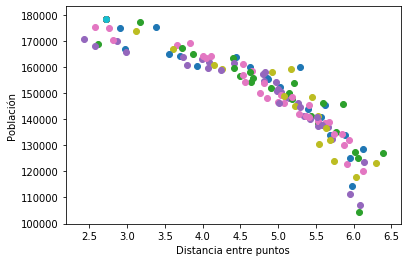

In [8]:
#Initialization
pob = []

for k in range(10):
    gen_no=0
    while(gen_no<max_gen):

        num_alleles = len(allele_pool)
        pob = []
        for i in range(100):
            new_chromosome = [allele_pool[random.randrange(0, num_alleles)] for j in range(10)]
            pob.append(new_chromosome)

        function1_values = [function1(pob[i])for i in range(0,pop_size)]
        function2_values = [function2(pob[i])for i in range(0,pop_size)]
        non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],function2_values[:])

        function1_values_par = []
        function2_values_par = []

        for valuez in non_dominated_sorted_solution[0]:
            #print((pob[valuez]),end=" ")
            function1_values_par.append(function1_values[valuez])
            function2_values_par.append(function2_values[valuez])

        crowding_distance_values=[]
        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(function1_values[:],function2_values[:],non_dominated_sorted_solution[i][:]))
        solution2 = pob[:]

        #Generating offsprings
        a1 = random.randint(0,pop_size-1)
        b1 = random.randint(0,pop_size-1)
        appen = crossover(pob[a1],pob[b1])
        solution2.append(appen[0])
        solution2.append(appen[1])
        solution2.remove(pob[a1])
        solution2.remove(pob[b1])

        function1_values2 = [function1(solution2[i])for i in range(0,num_individuals)]
        function2_values2 = [function2(solution2[i])for i in range(0,num_individuals)]

        non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:],function2_values2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(function1_values2[:],function2_values2[:],non_dominated_sorted_solution2[i][:]))
        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==pop_size):
                    break
            if (len(new_solution) == pop_size):
                break
        solution = [solution2[i] for i in new_solution]

        best_fitness = 0
        best_a = 0
        a = 0
        for sol in function1_values2:
            if sol > best_fitness:
              best_fitness = sol
              best_a = a
            a += 1
        best_fitness_b = 0
        best_b = 0
        b = 0
        for sol in function2_values2:
            if sol > best_fitness:
              best_fitness_b = sol
              best_b = b
            b += 1

        gen_no = gen_no + 1
    print(k+1, solution[best_a], best_fitness, best_fitness_b)

    #Lets plot the final front now
    function1_plot = [i * 1 for i in function1_values_par]
    function2_plot = [j * 1 for j in function2_values_par]
    plt.xlabel('Distancia entre puntos', fontsize=10)
    plt.ylabel('Población', fontsize=10)
    plt.scatter(function1_plot, function2_plot)
    plt.scatter([2.71905], [178400])
plt.show()